In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

# Movies on 50's and 60's made more revenue than movies nowadays (00's and 10's)

- **H0** = No difference between revenue of movies between 50's/60's and movies nowadays (00's/10's 
- **H1** = There is a difference 

In [2]:
data_with_inflation = pd.read_csv('data_adjusted_to_inflation.csv')
data_for_ht = data_with_inflation.replace(0,data_with_inflation.median())

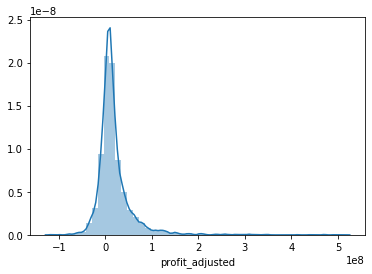

In [3]:
sns.distplot(data_for_ht.profit_adjusted)

In [4]:
fifth_movies_profit_adjusted = np.array(data_for_ht[(data_for_ht['decade'] == "50s")|(data_for_ht['decade'] == "60s")]['profit_adjusted'])
now_movies_profit_adjusted = np.array(data_for_ht[(data_for_ht['decade']== "00s")|(data_for_ht['decade'] == "10s")]['profit_adjusted'])

In [5]:
# romance_movies_profit_adjusted

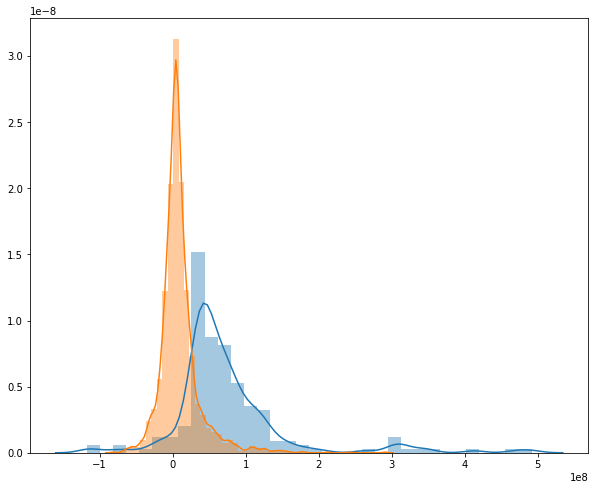

In [6]:
plt.figure(figsize=(10,8))

sns.distplot(fifth_movies_profit_adjusted)
sns.distplot(now_movies_profit_adjusted)


### Sampling samples

In [7]:
import random 

In [109]:
def samples_means(array, samples_wanted):
    sample_means = []
    for i in range(samples_wanted):
        sample_means.append(np.mean(random.sample(list(array), 40)))
    return sample_means

In [110]:
fiv_sample_means = samples_means(fifth_movies_profit_adjusted, 100)
now_sample_means = samples_means(now_movies_profit_adjusted, 100)

print(fiv_sample_means, now_sample_means)

[71276370.16674165, 89123467.06673436, 68104051.30649021, 61420524.39788423, 59919814.318837, 75374415.8912441, 55196324.60357754, 78891210.75681725, 72569332.05614947, 72134275.78357132, 75709525.11305156, 96360842.83209375, 94658075.57972379, 60678871.67203327, 79147726.21280071, 84466723.03348127, 81890690.85914285, 69670581.33000454, 71307277.65652391, 66462795.55918248, 97298919.71066809, 69312079.93547659, 75461527.26597254, 99507900.9456047, 93621284.04699337, 66942054.117122546, 64915714.354366705, 81361688.03156064, 77412135.33144319, 72172488.69856337, 72237889.06312284, 80434483.0936857, 77271906.57991102, 65454130.74454348, 108520038.15083845, 64966055.22066889, 61766508.457321644, 75258423.8269562, 101293435.5303376, 65843698.53752802, 70419615.7962846, 99240424.2231807, 62934546.01378999, 64941110.37456316, 83302074.37735245, 81914182.89567193, 67496518.70515642, 78982691.97944823, 84586867.64668687, 76297215.62695415, 66333778.34907935, 79201171.36848775, 70625703.817309

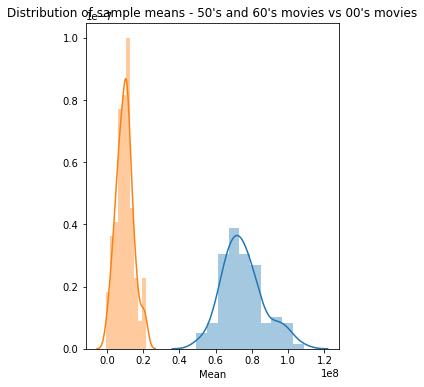

In [111]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.distplot(fiv_sample_means, axlabel='Mean')

# plt.subplot(1,2,2)
sns.distplot(now_sample_means)

plt.title("Distribution of sample means - 50's and 60's movies vs 00's movies")
plt.show()



In [112]:
# sns.distplot(now_sample_means)

### Back to the two "populations"

In [113]:
print("The mean for 50s movies is :",fifth_movies_profit_adjusted.mean())
print("The std for 50s movies is :",fifth_movies_profit_adjusted.std())
print("The var for 50s movies is :",fifth_movies_profit_adjusted.var())

print('=====================')

print("The mean for now movies is :",now_movies_profit_adjusted.mean())
print("The std for now movies is :",now_movies_profit_adjusted.std())
print("The var for now movies is :",now_movies_profit_adjusted.var())



The mean for 50s movies is : 76559381.44716212
The std for 50s movies is : 82982193.1145535
The var for 50s movies is : 6886044374101050.0
The mean for now movies is : 9618632.796179065
The std for now movies is : 27623106.735850368
The var for now movies is : 763036025740181.9


### Welch t-test

In [114]:
def welch_t(a, b):
    
    """ Calculate Welch's t-statistic for two samples. """

    numerator = a.mean() - b.mean()
    
    # “ddof = Delta Degrees of Freedom”: the divisor used in the calculation is N - ddof, 
    #  where N represents the number of elements. By default ddof is zero.
    
    denominator = np.sqrt(a.var(ddof=1)/a.size + b.var(ddof=1)/b.size)
    
    return np.abs(numerator/denominator)

print('Wlech T-test is: {}'.format(welch_t(fifth_movies_profit_adjusted, now_movies_profit_adjusted)))

Wlech T-test is: 11.071194499940479


### Degrees of freedom

In [115]:
def welch_df(a, b):
    
    """ Calculate the effective degrees of freedom for two samples. """
    
    s1 = a.var(ddof=1) 
    s2 = b.var(ddof=1)
    n1 = a.size
    n2 = b.size
    
    numerator = (s1/n1 + s2/n2)**2
    denominator = (s1/ n1)**2/(n1 - 1) + (s2/ n2)**2/(n2 - 1)
    
    return numerator/denominator

print('Wlech degrees of freedom are: {}'.format(welch_df(fifth_movies_profit_adjusted, now_movies_profit_adjusted)))

Wlech degrees of freedom are: 193.3316231895007


In [116]:
t = welch_t(fifth_movies_profit_adjusted, now_movies_profit_adjusted)
df = welch_df(fifth_movies_profit_adjusted, now_movies_profit_adjusted)

### Convert to p-value

In [117]:
import scipy.stats as stats

In [118]:
p = 1 - float(stats.t.cdf(t, df))
print(p)

0.0


### Cohen's d test

In [119]:
def Cohen_d(group1, group2):

    # Compute Cohen's d.

    # group1: Series or NumPy array
    # group2: Series or NumPy array

    # returns a floating point number 

    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    # Calculate the pooled threshold as shown earlier
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)
    
    return d

In [120]:
Cohen_d(fifth_movies_profit_adjusted, now_movies_profit_adjusted)

1.9225664152448578

# Movies nowadays have higher budget than movies on 50's and 60's

- **H0**= No difference between budgets of movies between 50's/60's and movies nowadays (00's/10's)
- **H1**= There is a difference

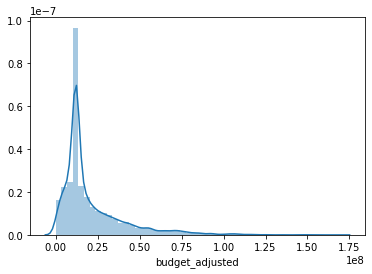

In [20]:
sns.distplot(data_for_ht.budget_adjusted)

In [21]:
fifth_movies_budget_adjusted = np.array(data_for_ht[(data_for_ht['decade'] == "50s")|(data_for_ht['decade'] == "60s")]['budget_adjusted'])
now_movies_budget_adjusted = np.array(data_for_ht[(data_for_ht['decade']== "00s")|(data_for_ht['decade'] == "10s")]['budget_adjusted'])

In [22]:
# romance_movies_profit_adjusted

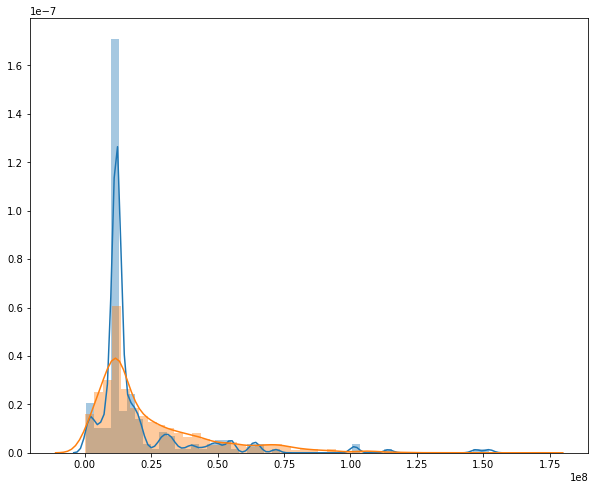

In [23]:
plt.figure(figsize=(10,8))

sns.distplot(fifth_movies_budget_adjusted)
sns.distplot(now_movies_budget_adjusted)


### Sampling samples

In [98]:
import random 

In [106]:
def samples_means(array, samples_wanted):
    sample_means = []
    for i in range(samples_wanted):
        sample_means.append(np.mean(random.sample(list(array), 40)))
    return np.array(sample_means)

In [107]:
fiv_sample_means = samples_means(fifth_movies_budget_adjusted, 100)
now_sample_means = samples_means(now_movies_budget_adjusted, 100)

print(fiv_sample_means, now_sample_means)

[21575106.97225527 18133439.09989859 19857405.79602469 19351747.30781438
 27107311.85685393 17791918.23413444 21486736.14882254 15375876.38136999
 20811762.68045932 17078132.4086693  19873254.2962987  21206802.65745694
 22216231.03617959 19916177.05583641 17935147.91985691 24525278.79609967
 25172831.09623672 14989400.89089848 19385624.84971914 26423310.96342398
 22824229.97631096 16476548.23150323 28562235.16204593 19846265.29383994
 16490699.03726371 22438802.12622586 16337562.99704439 17745548.0643018
 21413897.14744269 17358906.79637388 20927849.36873891 23859368.06512145
 24760138.45642259 22984944.695911   22798627.41835676 27019887.18205906
 17304524.75245764 22730437.12281145 20045569.80081351 16872172.42597729
 19693723.49827132 27989920.29183377 13953199.84280428 15871126.78881876
 26258746.98038781 17833910.01357599 20447437.921924   18618155.50077261
 20276191.93811303 18899545.51238399 22956892.52375614 18755715.42234365
 29201788.14499811 17578646.34199109 19574127.974580

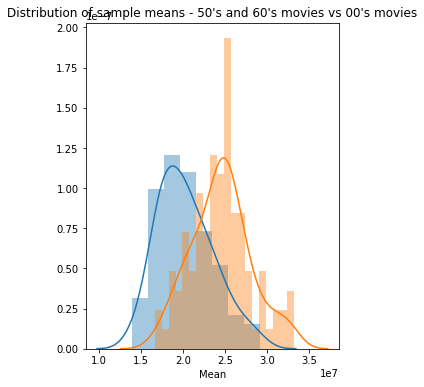

In [108]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.distplot(fiv_sample_means, axlabel='Mean')

# plt.subplot(1,2,2)
sns.distplot(now_sample_means, bins = 20)

plt.title("Distribution of sample means - 50's and 60's movies vs 00's movies")
plt.show()




In [28]:
# sns.distplot(now_sample_means)

### Back to the two "populations"

In [75]:
print("The mean for 50s movies is :",fifth_movies_budget_adjusted.mean())
print("The std for 50s movies is :",fifth_movies_budget_adjusted.std())
print("The var for 50s movies is :",fifth_movies_budget_adjusted.var())

print('=====================')

print("The mean for now movies is :",now_movies_budget_adjusted.mean())
print("The std for now movies is :",now_movies_budget_adjusted.std())
print("The var for now movies is :",now_movies_budget_adjusted.var())



The mean for 50s movies is : 19764124.990171283
The std for 50s movies is : 21891245.965123907
The var for 50s movies is : 479226649905553.75
The mean for now movies is : 24423378.743268598
The std for now movies is : 22223271.86481622
The var for now movies is : 493873812377532.06


### Welch t-test

In [76]:
def welch_t(a, b):
    
    """ Calculate Welch's t-statistic for two samples. """

    numerator = a.mean() - b.mean()
    
    # “ddof = Delta Degrees of Freedom”: the divisor used in the calculation is N - ddof, 
    #  where N represents the number of elements. By default ddof is zero.
    
    denominator = np.sqrt(a.var(ddof=1)/a.size + b.var(ddof=1)/b.size)
    
    return np.abs(numerator/denominator)

print('Wlech T-test is: {}'.format(welch_t(fifth_movies_budget_adjusted, now_movies_budget_adjusted)))

Wlech T-test is: 2.821414107427349


### Degrees of freedom

In [77]:
def welch_df(a, b):
    
    """ Calculate the effective degrees of freedom for two samples. """
    
    s1 = a.var(ddof=1) 
    s2 = b.var(ddof=1)
    n1 = a.size
    n2 = b.size
    
    numerator = (s1/n1 + s2/n2)**2
    denominator = (s1/ n1)**2/(n1 - 1) + (s2/ n2)**2/(n2 - 1)
    
    return numerator/denominator

print('Wlech degrees of freedom are: {}'.format(welch_df(fifth_movies_budget_adjusted, now_movies_budget_adjusted)))

Wlech degrees of freedom are: 221.99915543691014


In [78]:
t2 = welch_t(fifth_movies_budget_adjusted, now_movies_budget_adjusted)
df2 = welch_df(fifth_movies_budget_adjusted, now_movies_budget_adjusted)

### Convert to p-value

In [79]:
import scipy.stats as stats

In [80]:
p = 1 - float(stats.t.cdf(t2, df2))
print(p)

0.0026073484046530426


### Cohen's d test

In [81]:
Cohen_d(now_movies_budget_adjusted, fifth_movies_budget_adjusted)

0.2098850151504559

### Evaluating pdf's

In [89]:
import scipy.stats

In [93]:
fiv_for_pdf = scipy.stats.norm(fifth_movies_budget_adjusted.mean(), fifth_movies_budget_adjusted.std())

now_for_pdf = scipy.stats.norm(now_movies_budget_adjusted.mean(), now_movies_budget_adjusted.std())

In [94]:
def evaluate_PDF(rv, x=4):
    '''Input: a random variable object, standard deviation
    output : x and y values for the normal distribution
    '''
    
    # Identify the mean and standard deviation of random variable 
    mean = rv.mean()
    std = rv.std()

    # Use numpy to calculate evenly spaced numbers over the specified interval (4 sd) and generate 100 samples.
    xs = np.linspace(mean - x*std, mean + x*std, 100)
    
    # Calculate the peak of normal distribution i.e. probability density. 
    ys = rv.pdf(xs)

    return xs, ys

Text(0.5, 0, 'height (cm)')

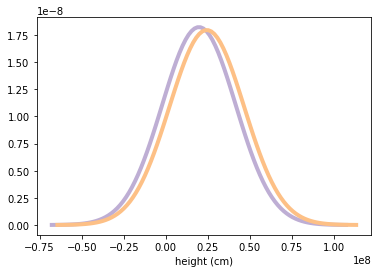

In [95]:
xs, ys = evaluate_PDF(fiv_for_pdf)
plt.plot(xs, ys, label='50s/60s', linewidth=4, color='#beaed4') 


xs, ys = evaluate_PDF(now_for_pdf)
plt.plot(xs, ys, label='Now', linewidth=4, color='#fdc086')

plt.xlabel('height (cm)')

### Overlap threshold

In [64]:
mean1 = np.mean(fiv_sample_means)
mean2 = np.mean(now_sample_means)

In [69]:
sample_of_sm_distr_fifth = random.sample(fiv_sample_means, 50)
sample_of_sm_distr_now = random.sample(now_sample_means, 50)


#### Difference in sample means (Effect Size)

In [41]:
difference_in_means = abs(mean1 - mean2)
difference_in_means
print("Difference between sample means (Effect size) is {}".format(difference_in_means))

Difference between sample means (Effect size) is 4553445.429803595


In [44]:
simple_thresh = (mean1 + mean2) / 2
simple_thresh

23520789.57034756

In [70]:
fifth_below_thresh = sum(sample_of_sm_distr_fifth < simple_thresh)
fifth_below_thresh

50

In [71]:
now_below_thresh = sum(sample_of_sm_distr_now < simple_thresh)
now_below_thresh

20

In [ ]:
# Male height
m_xs, male_ys = evaluate_PDF(male_height)
plt.plot(m_xs, male_ys, label='male', linewidth=4, color='#beaed4') 

#Female height 
f_xs, female_ys = evaluate_PDF(female_height)
plt.plot(f_xs, female_ys, label='female', linewidth=4, color='#fdc086')
plt.vlines(thresh,ymin=0,ymax=0.06)
plt.fill_betweenx(male_ys,x1 = m_xs,x2=thresh, where = m_xs < thresh,color='b')
plt.fill_betweenx(female_ys,x1=f_xs,x2=thresh, where = f_xs > thresh,color='b')
plt.xlabel('height (cm)')